In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
 # Read the AirPassengers dataset
monthlycsv = pd.read_csv('1683361656monthlycsv.csv', index_col ='Date', parse_dates= True)
# Print the first five rows of the dataset
monthlycsv.head()

,Price
Date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


In [ ]:
monthlycsv.shape

(842, 1)

In [ ]:
# import data
dataset_train = pd.read_csv('1683361656monthlycsv.csv')
dataset_train.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [ ]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
training_set.shape

(842, 1)

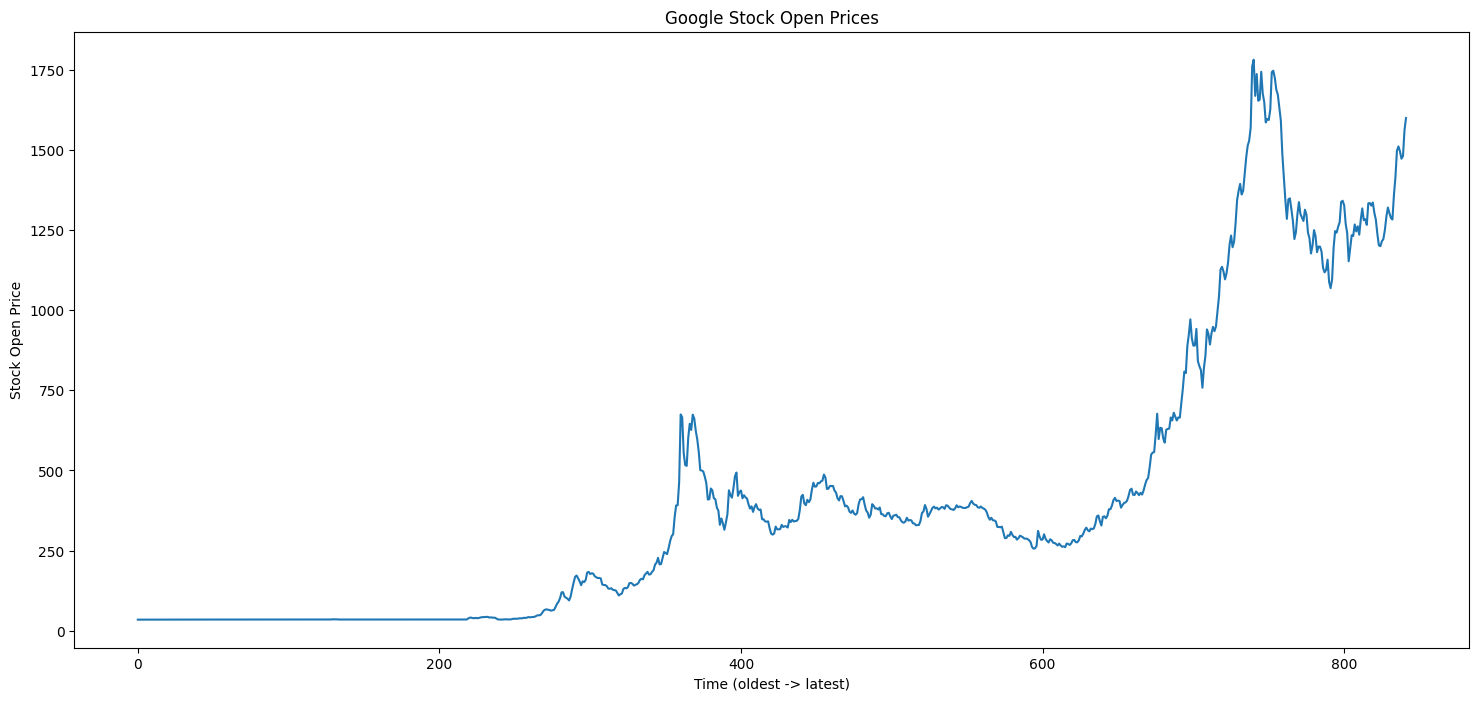

In [ ]:
#Ploting
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Price'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

In [ ]:
#Scaling the data
# feature scaling
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
### spliting the dat
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(782, 60)

In [ ]:
y_train.shape

(782,)

In [ ]:
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(782, 60, 1)

In [ ]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 25, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 25 neurons
regressor.add(LSTM(units = 25, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 25, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 25, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(x = X_train, y = y_train, batch_size = 60, epochs =950)

Epoch 1/950
14/14 [==============================] - 13s 317ms/step - loss: 0.0546
Epoch 2/950
14/14 [==============================] - 4s 252ms/step - loss: 0.0115
Epoch 3/950
14/14 [==============================] - 4s 271ms/step - loss: 0.0094
Epoch 4/950
14/14 [==============================] - 4s 327ms/step - loss: 0.0084
Epoch 5/950
14/14 [==============================] - 4s 270ms/step - loss: 0.0088
Epoch 6/950
14/14 [==============================] - 4s 256ms/step - loss: 0.0066
Epoch 7/950
14/14 [==============================] - 2s 117ms/step - loss: 0.0065
Epoch 8/950
14/14 [==============================] - 2s 148ms/step - loss: 0.0063
Epoch 9/950
14/14 [==============================] - 3s 187ms/step - loss: 0.0054
Epoch 10/950
14/14 [==============================] - 2s 128ms/step - loss: 0.0049
Epoch 11/950
14/14 [==============================] - 2s 126ms/step - loss: 0.0060
Epoch 12/950
14/14 [==============================] - 2s 127ms/step - loss: 0.0049
Epoch 13/950

In [ ]:
dataset_test = pd.read_csv('1683361656monthlycsv.csv')

In [ ]:
dataset_test.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [ ]:
#keras only takes numpy array
real_price = dataset_test.iloc[:, 1:2].values
real_price.shape

(842, 1)

In [ ]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Price'], dataset_test['Price']), axis = 0)
dataset_total.shape

(1684,)

In [ ]:
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [ ]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)

In [ ]:
len(inputs)

902

In [ ]:
X_test=[]
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
X_test.shape

(842, 60, 1)

In [ ]:
predicted_price = regressor.predict(X_test)

27/27 [==============================] - 3s 41ms/step


In [ ]:
#inverse the scaled value
predicted_price = sc.inverse_transform(predicted_price)

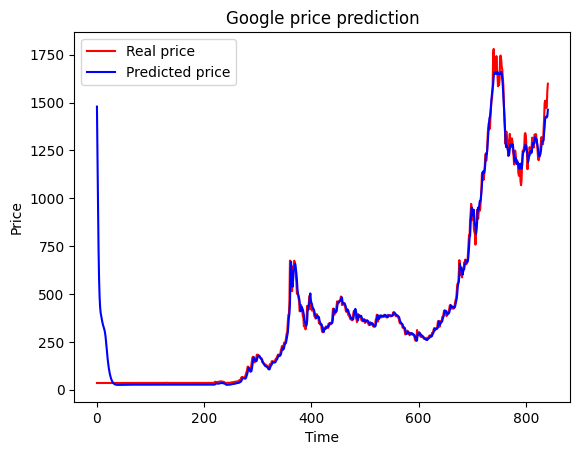

In [ ]:
##visualize the prediction and real price
plt.plot(real_price, color = 'red', label = 'Real price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(real_price, predicted_price)
print("MSE:", mse)

MSE: 8624.147361555892


In [ ]:
rmse = mean_squared_error(real_price, predicted_price, squared=False)
print("RMSE:", rmse)

RMSE: 92.86628754050574


#END